In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
df =pd.read_csv('forestfire.csv')


In [ ]:
df.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
dfp =df.drop('day',axis=1)

In [ ]:
 df.head(10)

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1
5,8,6,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0
6,8,6,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0
7,8,6,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0
8,8,6,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0
9,7,5,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(dfp)
scaled = pd.DataFrame(scaler.transform(dfp),columns=dfp.columns)
scaled.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,0.5
1,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0
2,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0
3,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,0.5
4,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.5


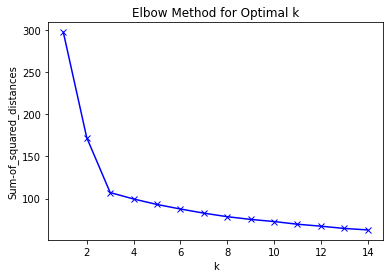

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
     km = KMeans(n_clusters=k)
     km = km.fit(scaled)
     Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum-of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
clusterNum=3
k_means = KMeans(init = "k-means++",n_clusters = clusterNum, n_init =12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 1 1 1 1 1 0 0 0 2 2 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1 2 0
 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2
 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 1 1 1 0 1 1 1 0 1 1 0 2 0
 1 0 0 0 1 0 1 0 1 1 1 0 2 0 2 0 0 2 0 0 2 0 0 0 0 1 1 1 2 1 1 0 1 0 2 0 0
 1 2 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 2 0 2 1 1 0 0 0 1 0 0 2 2 2 1 1 1 2 0 1
 2 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 2 2 2 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 1 0 1 0 0 0
 2 0 0 2 2 2 2 2 2 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 1 0 0 0 0 1 2 2 0 0 0 0 0 1 1 2 0 0 2 0 1 2 2 2 1 0 1 0 0 1 0 0 1 1 0
 2 1 1 2 2 0 0 0 0 0 2 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 2 1
 1 2 0 2 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 1 

In [ ]:
df["cluster"] = labels
df.head(10)

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,2
1,7,4,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,2
4,8,6,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,2
5,8,6,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0
6,8,6,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0
7,8,6,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0
8,8,6,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0
9,7,5,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0


In [ ]:
df.groupby('cluster').mean()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
cluster,,,,,,,,,,,
0,6.896907,4.814433,91.721134,131.959794,656.31134,9.973711,20.574227,44.628866,3.876289,0.054639,20.086340
1,2.568807,3.747706,91.745413,130.950000,664.12156,9.790367,20.824312,43.206422,3.766972,0.001835,9.815183
2,4.914286,4.495238,86.370476,30.225714,106.49619,5.666667,11.758095,45.904762,4.799048,0.001905,5.767524


In [ ]:
frame = pd.DataFrame(scaled)
frame['cluster'] = labels
frame['cluster'].value_counts()

1    218
0    194
2    105
Name: cluster, dtype: int64

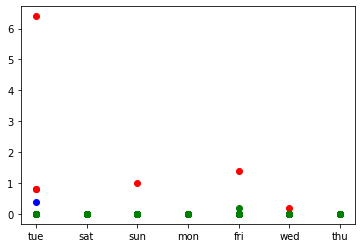

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1.day,df1.rain,color='red')
plt.scatter(df2.day,df2.rain,color='blue')
plt.scatter(df3.day,df3.rain,color='green')
